In [97]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [ ]:
# load image
source_pictures =['thanos.png','man.png','woman.png','captain.png']
background_images = ['background_0.png','background_1.png','background_2.png','background_3.png', 'background_4.png']

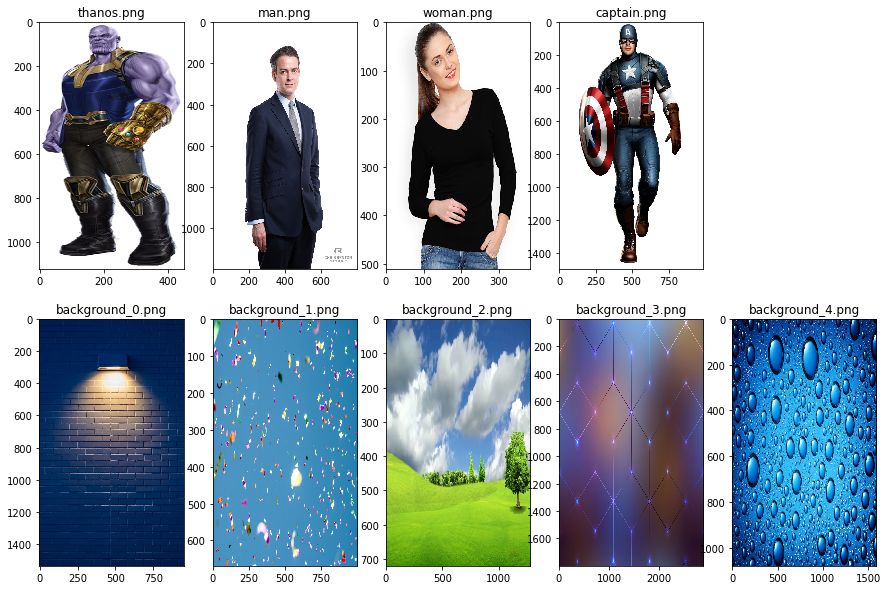

In [303]:
f , axarr = plt.subplots(nrows=2,ncols=5, figsize=(15,10))
for i in range(len(source_pictures)): 
    plt.sca(axarr[0,i]);
    image = plt.imread(source_pictures[i])
    plt.imshow(image, interpolation='nearest', aspect='auto'); plt.title(source_pictures[i])
f.delaxes(axarr[0][4])
    
for i in range(len(background_images)): 
    plt.sca(axarr[1,i]);
    image = plt.imread(background_images[i])
    plt.imshow(image, interpolation='nearest', aspect='auto'); plt.title(background_images[i])

Text(0.5, 1.0, 'background_4.png')

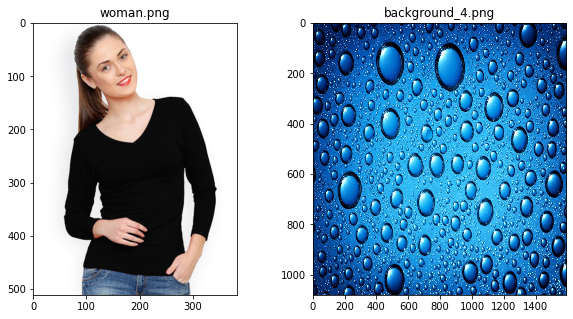

In [353]:
selected_picture = random.choice(source_pictures)
selected_background = random.choice(background_images)
img = cv2.imread(selected_picture)
backimg = cv2.imread(selected_background)
f , axarr = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
plt.sca(axarr[0]);
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title(selected_picture)
plt.sca(axarr[1]);
plt.imshow(cv2.cvtColor(backimg, cv2.COLOR_BGR2RGB), interpolation='nearest', aspect='auto'); plt.title(selected_background)

In [354]:
# convert to graky
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [355]:
# threshold input image as mask
if selected_picture == 'woman.png':
    # woman
    mask = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY)[1]
elif selected_picture == 'man.png':
    # man
    mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)[1]
elif selected_picture == 'thanos.png':
    # thanos
    mask = cv2.threshold(gray, 245, 255, cv2.THRESH_BINARY)[1]
elif selected_picture == 'captain.png':
    # captain
    mask = cv2.threshold(gray, 235, 255, cv2.THRESH_BINARY)[1]

In [356]:
# negate mask
mask = 255 - mask

In [357]:
# apply morphology to remove isolated extraneous noise
# use borderconstant of black since foreground touches the edges
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

In [358]:
# anti-alias the mask -- blur then stretch
# blur alpha channel
mask = cv2.GaussianBlur(mask, (0,0), sigmaX=1, sigmaY=2, borderType = cv2.BORDER_DEFAULT)

In [359]:
# linear stretch so that 127.5 goes to 0, but 255 stays 255
mask = (2*(mask.astype(np.float32))-255.0).clip(0,255).astype(np.uint8)

In [360]:
# put mask into alpha channel
result = img.copy()
result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = mask

Text(0.5, 1.0, 'result')

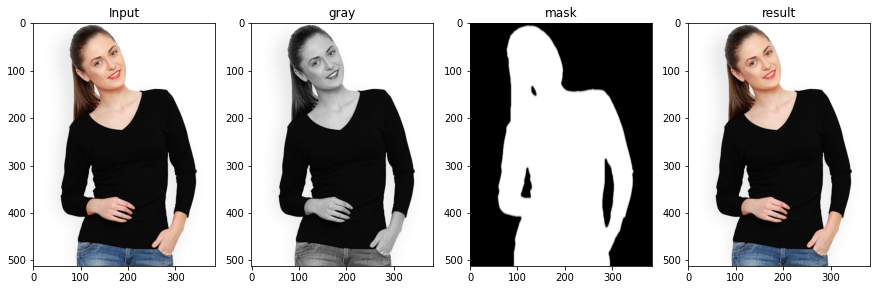

In [361]:
f , axarr = plt.subplots(nrows=1,ncols=4, figsize=(15,15))
plt.sca(axarr[0]);
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title('Input')
plt.sca(axarr[1]);
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)); plt.title('gray')
plt.sca(axarr[2]);
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)); plt.title('mask')
plt.sca(axarr[3]);
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGRA2RGB)); plt.title('result')

In [362]:
backimg = cv2.cvtColor(backimg, cv2.COLOR_BGR2BGRA)
height, width = result.shape[:2]

resizeBack = cv2.resize(backimg, (width, height), interpolation = cv2.INTER_CUBIC)

for i in range(width):
    for j in range(height):
        pixel = result[j, i]
        if np.all(pixel[3] == 0):
            result[j, i] = resizeBack[j, i]
            

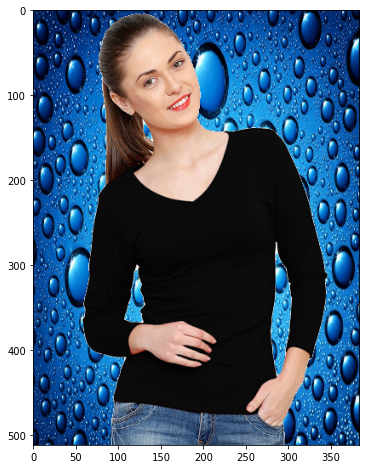

In [363]:
plt.figure(figsize = (15,8))
result = cv2.cvtColor(result, cv2.COLOR_BGRA2RGB)
plt.imshow(result)